In [62]:
# python version: python3
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## DATA PREPARATION

### Spliting data into X and y:

In [82]:
train_set = pd.read_csv('training.csv')
train_set = train_set[train_set.price.notnull()]
train_x_a = train_set.drop("price", axis=1) #dropping null values
train_y = pd.DataFrame(train_set["price"])

In [83]:
train_x_a.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,NaN,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


In [84]:
train_y.head(2)

,price
0,15985.0
1,7349.0


### Handling missing values

In [85]:
nan_columns = []
for (columnName, columnData) in train_x_a.iteritems(): #checking in every column if there is any null value and append it to a list
    if True in columnData.isnull().values:
        nan_columns.append(columnName)       
            
train_x_b = train_x_a.fillna(train_x_a.median()) #filling missing value with the median



/var/folders/89/k6flrqns6kgbv2d5p3q2b6dc0000gn/T/ipykernel_4239/711160484.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_x_b = train_x_a.fillna(train_x_a.median()) #filling missing value with the median


In [86]:
train_x_b.head(2)

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,...,four,141.0,mpfi,3.31,3.15,9.5,114.0,5400.0,24.0,28.0
1,gas,std,four,wagon,fwd,front,94.5,170.2,63.8,53.5,...,four,97.0,2bbl,3.15,3.29,9.4,69.0,5200.0,31.0,37.0


### Handling categorical variables

In [87]:
col= train_x_a.columns
num_cols = train_x_a._get_numeric_data().columns
categorical_columns=list([set(col) - set(num_cols)][0]) #Taking only the columns with categorical values
categorical_columns

['enginelocation',
 'doornumber',
 'cylindernumber',
 'drivewheel',
 'enginetype',
 'aspiration',
 'carbody',
 'fuelsystem',
 'fueltype']

### Perfoming One hot encoding on features with categorical values

In [115]:
train_x_d = pd.get_dummies(train_x_b, columns = categorical_columns)

In [116]:
train_x_d.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fueltype_diesel,fueltype_gas
0,104.3,188.8,67.2,56.2,2403.0,141.0,3.31,3.15,9.5,114.0,...,0,0,0,0,0,0,1,0,0,1
1,94.5,170.2,63.8,53.5,2024.0,97.0,3.15,3.29,9.4,69.0,...,1,0,1,0,0,0,0,0,0,1


### Standard scaling

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_x_d)
train_x_e = pd.DataFrame(scaled_data, columns=train_x_d.columns) 

In [91]:
train_x_e.head(2)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi
0,1.040486,1.218356,0.697865,1.103479,-0.217359,0.427546,-0.000506,-0.298040,-0.115772,0.312992,...,-0.080582,-0.080582,-0.114332,-0.248282,-0.720838,-0.114332,-0.315104,-0.080582,1.146051,-0.248282
1,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.679464,-0.628165,0.134277,-0.142667,-0.909358,...,-0.080582,-0.080582,-0.114332,-0.248282,1.387274,-0.114332,-0.315104,-0.080582,-0.872562,-0.248282


## Data Exploration

### Visualize variable distributions

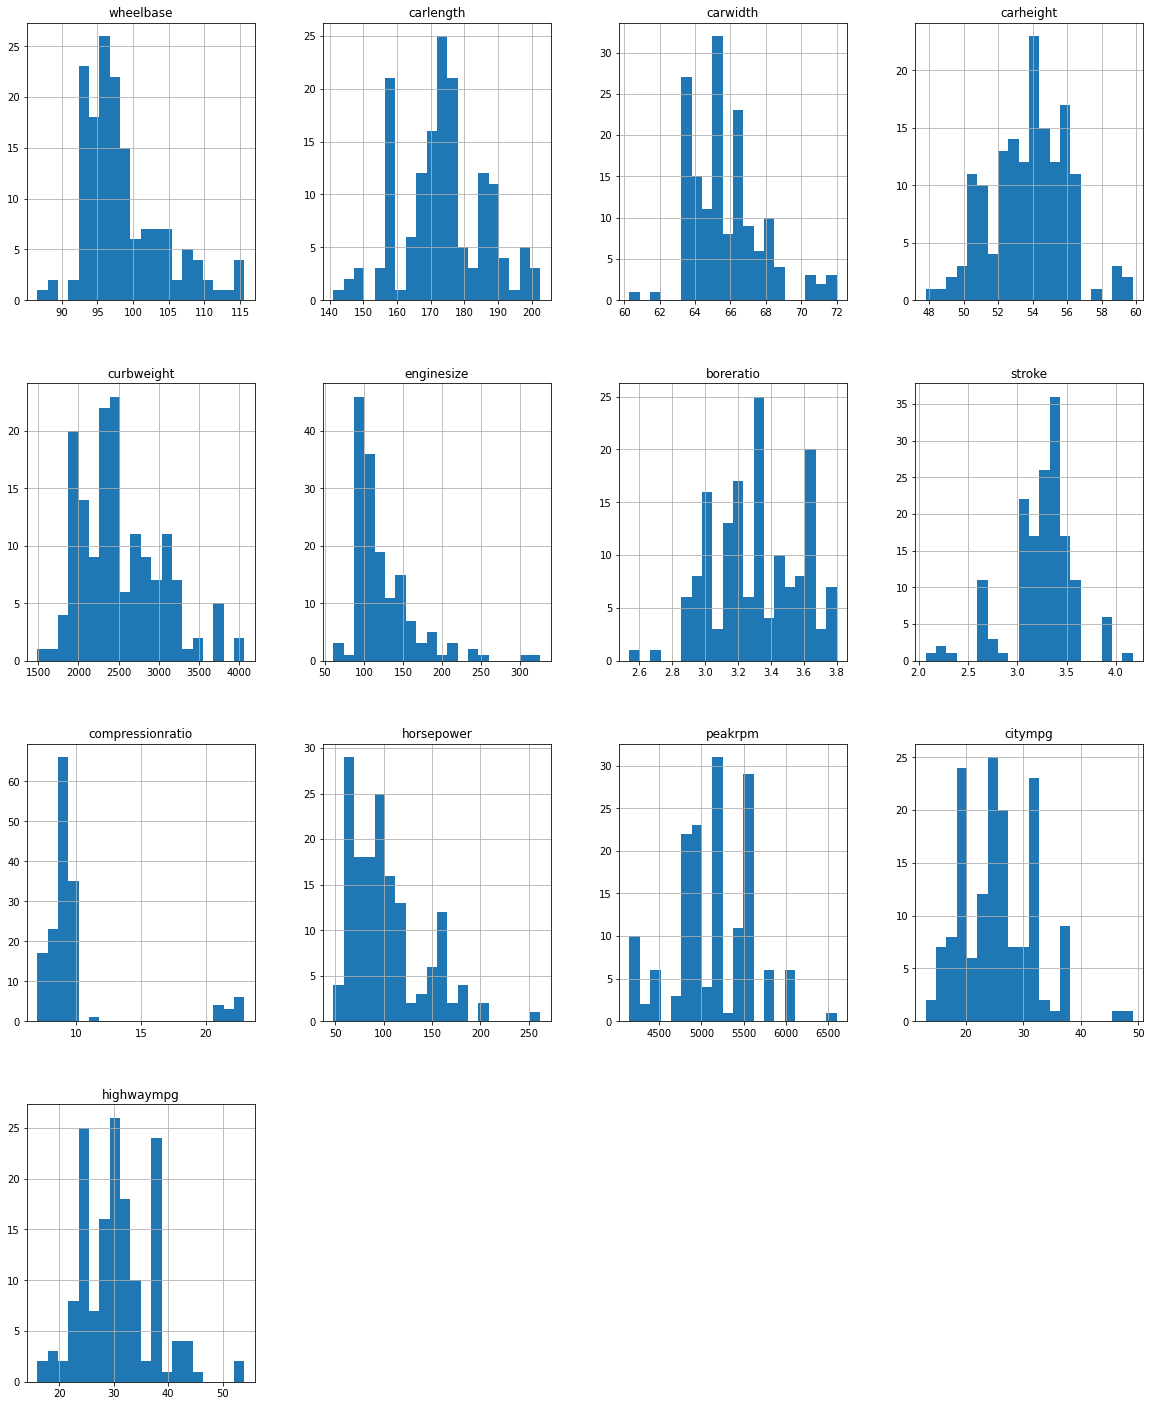

In [92]:

train_x_b.hist(bins=20, figsize=(20,25))
plt.show()

### Calculating correlation:

In [113]:
corr = train_set.corr().abs()
histt = dict({ (columnName, columnData.values[-1]) for columnName, columnData in corr.iteritems() if columnName != "price"  })
sort = sorted(histt.items(), key=lambda x: (x[1], x[0]),reverse=True)
top_5_corr = list(dict(sort).keys())[:5]

In [106]:
print(top_5_corr)

['enginesize', 'curbweight', 'carwidth', 'horsepower', 'carlength']


### Scatter plot

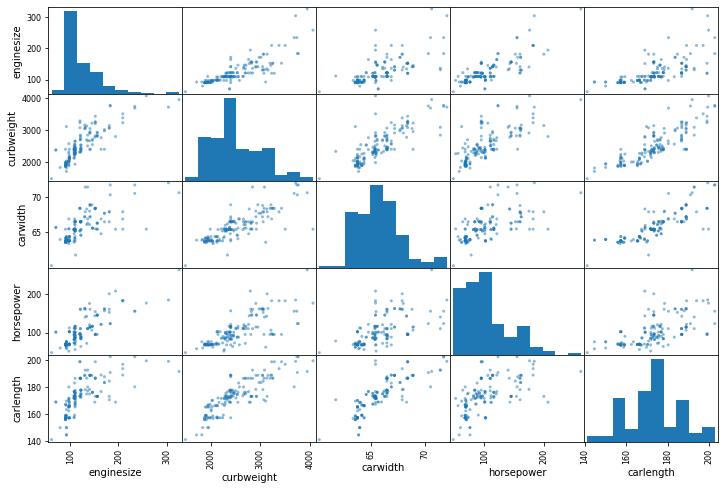

In [107]:
from pandas.plotting import scatter_matrix
xnew= train_x_d[top_5_corr]
scatter_matrix(xnew, figsize=(12, 8))
plt.show()


## LINEAR REGRESSION TO PREDICT CAR PRICES

### Creating Model

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(train_x_e, train_y)

LinearRegression()

In [96]:
pre= lr_model.predict(train_x_e)
mse=mean_squared_error(train_y,pre )
print(mse)

4293452.590313232


### Validating the model:

In [97]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

train_mse_score = cross_val_score(lr_model, train_x_e, train_y,
                         scoring="neg_mean_squared_error", cv=5)
train_mse_score= list(map(abs, train_mse_score)) 
print(train_mse_score)

[10057504.282265702, 6941861.4653629055, 8010686.218486165, 11491802.34766701, 6098813.964649595]


In [98]:
average_mse = sum(train_mse_score)/len(train_mse_score)
print(average_mse)

8520133.655686276


### Testing the model:

In [146]:
from sklearn.preprocessing import StandardScaler

test_set= pd.read_csv('test.csv')
test_set = test_set[test_set.price.notnull()]#dropping null values
test_x = test_set.drop("price", axis=1)
test_y = pd.DataFrame(test_set.price)

test_x = test_x.fillna(test_x.median())

test_x = pd.get_dummies(test_x, columns=categorical_columns)

test_x = pd.DataFrame(scaler.fit_transform(test_x), columns=test_x.columns) 

/var/folders/89/k6flrqns6kgbv2d5p3q2b6dc0000gn/T/ipykernel_4239/317077106.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_x = test_x.fillna(test_x.median())


In [148]:
test_x.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,carbody_wagon,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fueltype_diesel,fueltype_gas
0,0.932810,1.326619,2.076961,0.566013,0.430246,-0.042623,-0.712848,0.347447,-0.498378,0.047788,...,1.855921,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416,-0.377964,0.377964
1,-0.517275,-0.097773,-1.500195,-0.092620,-0.701135,-0.583212,-0.859073,0.987246,-0.379717,-0.479532,...,-0.538816,4.358899,-0.460566,-0.160128,-0.377964,-0.229416,-1.051315,-0.229416,-0.377964,0.377964
2,1.073141,0.898478,1.634841,0.236696,1.481924,0.934595,0.712848,1.200512,2.586820,0.333420,...,-0.538816,-0.229416,-0.460566,-0.160128,2.645751,-0.229416,-1.051315,-0.229416,2.645751,-2.645751
3,2.055456,1.894729,1.353491,-0.627759,2.591922,2.493985,0.895629,3.084366,-0.593307,1.497920,...,-0.538816,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416,-0.377964,0.377964
4,-1.608736,-0.632948,-0.495376,-1.121734,0.045343,1.163305,1.297748,-1.429774,-0.261055,2.179042,...,-0.538816,-0.229416,-0.460566,-0.160128,-0.377964,-0.229416,0.951190,-0.229416,-0.377964,0.377964


In [149]:
test_y.head(2)

,price
0,18920.0
1,10295.0


### Predicting on test set

In [134]:
predicted_values = lr_model.predict(test_x)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [150]:
print(predicted_values[10:13])

[[12250.87353063]
 [  988.4464297 ]
 [ 6068.59845079]]


In [151]:
test_mse_score =mean_squared_error(test_y,predicted_values )
print(test_mse_score)

31781254.451918982


In [152]:
coeffs = lr_model.coef_
print (coeffs)

[[ -182.50390789    17.77791293   482.81638969   104.58617988
   1594.18156825  4256.71313249   -38.99302906 -1321.89317472
    384.75573887  1307.10308185   517.30038623  -656.6777968
    909.82948041    63.44882098   -63.44882098  -345.01712899
    345.01712899   -79.19764443    79.19764443   309.15477368
     41.94235625  -351.57058775   212.54573996    26.44248644
   -100.41702336   -55.47707253   101.51605056  -267.79355313
    267.79355313  -371.41920837  -187.39716713  1176.64256697
    -84.87719409 -1725.97024765   176.79676558  1597.61307444
   -137.55006193  -995.94531305   567.19331492   431.12406866
   -315.88166818   176.79676558   130.33179437   -60.94295514
    176.79676558    63.44882098  -119.02206221   183.04212938
   -516.78989561]]


### Polynomial Features:

In [153]:
# pd.DataFrame(scaled_data, columns=train_x_d.columns) 

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
train_x_m = pd.DataFrame(poly_features.fit_transform(train_x_e))

In [154]:
train_x_m.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274
0,1.0,1.040486,1.218356,0.697865,1.103479,-0.217359,0.427546,-0.000506,-0.298040,-0.115772,...,0.099291,0.025392,-0.361126,0.078235,0.006494,-0.092351,0.020007,1.313433,-0.284544,0.061644
1,1.0,-0.729389,-0.266100,-1.003614,-0.089818,-0.968641,-0.679464,-0.628165,0.134277,-0.142667,...,0.099291,0.025392,0.274948,0.078235,0.006494,0.070313,0.020007,0.761364,0.216641,0.061644


In [155]:
lr_model_poly = LinearRegression()
lr_model_poly.fit(train_x_m, train_y)

train_mse_score2 = cross_val_score(lr_model, train_x_m, train_y,
                         scoring="neg_mean_squared_error", cv=5)
train_mse_score2= list(map(abs, train_mse_score2)) 
print(train_mse_score2)

[22160093.987830356, 1.8383224998843494e+27, 3.025615104314917e+30, 1.039945950228713e+28, 5.244670180649738e+26]


In [156]:
average_mse = sum(train_mse_score2)/len(train_mse_score2)
print(average_mse)

6.0767547066703076e+29


### Regularization

In [157]:
from sklearn.linear_model import Lasso
lasso = Lasso()




In [160]:
train_mse_score3 = cross_val_score(lr_model, train_x_e, train_y,
                         scoring="neg_mean_squared_error", cv=5)
train_mse_score3= list(map(abs, train_mse_score3))
train_mse_score3

[10057504.282265702,
 6941861.4653629055,
 8010686.218486165,
 11491802.34766701,
 6098813.964649595]

In [161]:


average_mse = sum(train_mse_score3)/len(train_mse_score3)
print(average_mse)

8520133.655686276


### Regularization Curve

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.341e+06, tolerance: 6.824e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.546e+05, tolerance: 7.541e+05
  model = cd_fast.enet_coordinate_descent(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

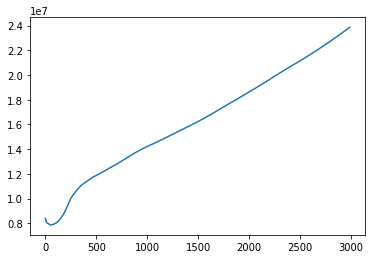

In [162]:
all_scores = []

for alpha in range(1, 3000, 10):  #I made a loop te repeat the same step i have done above.
    lasso = Lasso(alpha=alpha)
    train_mse_score4 = cross_val_score(lasso, train_x_e, train_y,
                         scoring="neg_mean_squared_error", cv=5)    
    train_mse_score4= list(map(abs, train_mse_score4))
    train_mse_score4= sum(train_mse_score4)/len(train_mse_score4) 
    all_scores.append((alpha, train_mse_score4))
    
    
min_error = sorted(all_scores, key = lambda x: x[1])[0][1] #sorting all_scores by errors and getting main error
min_alpha = sorted(all_scores, key = lambda x: x[1])[0][0] # sorting all_scores by errors and getting main alpha

x = [i[0] for i in all_scores]    
y = [i[1] for i in all_scores]    
  
plt.plot(x,y)
plt.show()

In [163]:
print("Minimum error was %d at alpha %d"%(round(min_error, 2), min_alpha))

Minimum error was 7868012 at alpha 51


### Grid Search

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid,  scoring='neg_mean_squared_error',)
grid_search.fit(train_x_e, train_y)

best_mse = abs(grid_search.best_score_)
best_parameters = grid_search.best_params_
best_mse


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

9849741.41457661

In [169]:
best_parameters

{'C': 3000.0, 'kernel': 'linear'}

[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END ..............................C=30.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=300.0, kernel=linear; total time=   0.0s
[CV] END .............................C=300.0, kernel=linear; total time=   0.0s
[CV] END ............................C=1000.0, kernel=linear; total time=   0.0s
[CV] END ............................C=3000.0, kernel=linear; total time=   0.0s
[CV] END ............................C=3000.0, kernel=linear; total time=   0.0s
[CV] END ...........................C=30000.0, kernel=linear; total time=   0.0s
[CV] END ...........................C=30000.0, kernel=linear; total time=   0.2s
[CV] END ...................

[CV] END ..............................C=10.0, kernel=linear; total time=   0.0s
[CV] END .............................C=100.0, kernel=linear; total time=   0.0s
[CV] END .............................C=300.0, kernel=linear; total time=   0.0s
[CV] END ............................C=1000.0, kernel=linear; total time=   0.0s
[CV] END ............................C=3000.0, kernel=linear; total time=   0.0s
[CV] END ............................C=3000.0, kernel=linear; total time=   0.1s
[CV] END ...........................C=30000.0, kernel=linear; total time=   0.2s
[CV] END ...........................C=30000.0, kernel=linear; total time=   0.1s
